# DS 2.1 notes
---

# Lesson 1: Intro to Machine Leaning

In [296]:
import pandas as pd 
import numpy as np
  
# initialize list of lists 
data = [[1000, 2], [1500, 3]]
  
# Create the pandas DataFrame 
df = pd.DataFrame(data, columns = ['x', 'y']) 
  
# print dataframe. 
df

,x,y
0,1000,2
1,1500,3


## Min Max Scaler


In [297]:
def max_min_scaler(matrix):
    return pd.DataFrame(zip(*[(np.array(matrix[column]) - min(matrix[column])) / (max(matrix[column]) - (min(matrix[column]))) for column in matrix]), columns = matrix.columns)
max_min_scaler(df)

,x,y
0,0.0,0.0
1,1.0,1.0


In [298]:
new_df = df.copy()
for column in df:
    col_range = max(df[column]) - min(df[column])
    col_arr = np.array(df[column])
    col_arr -= min(col_arr)
    col_arr = col_arr / col_range
    new_df[column] = col_arr
new_df

,x,y
0,0.0,0.0
1,1.0,1.0


## Use sklearn to do it for us

In [299]:
import sklearn
sklearn.__version__

'0.21.2'

In [300]:
from sklearn import preprocessing


X_train = np.array([[1000, 2], [1500, 3]])

min_max_scaler = preprocessing.MinMaxScaler()
X_minmax = min_max_scaler.fit_transform(X_train)
print(X_minmax)

[[0. 0.]
 [1. 1.]]


## Standard Scaling

### Do it yourself:

In [301]:
def standard_scaler(np_matrix):
    return (np_matrix - np_matrix.mean(axis=0)) / np_matrix.std(axis=0)
standard_scaler(X_train)

array([[-1., -1.],
       [ 1.,  1.]])

### Let sklearn do it

In [302]:
from sklearn import preprocessing

standard_scaler = preprocessing.StandardScaler()
standard_scaler.fit_transform(X_train)

array([[-1., -1.],
       [ 1.,  1.]])

---
# Lesson 2: Linear Regression

Text(0, 0.5, 'Water Drinks (Litre)')

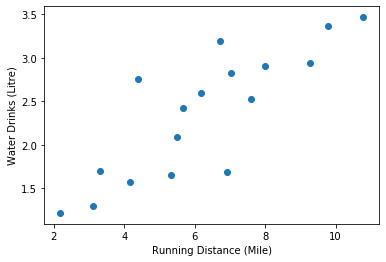

In [303]:
import numpy as np
import matplotlib.pyplot as plt

X = np.array([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
                         7.042,10.791,5.313,7.997,5.654,9.27,3.1])


Y = np.array([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
                         2.827,3.465,1.65,2.904,2.42,2.94,1.3])

plt.scatter(X, Y)
plt.xlabel('Running Distance (Mile)')
plt.ylabel('Water Drinks (Litre)')

## How do we find the line of best fit?

### We can try a creating our own line and finding its error

6.518593101764703


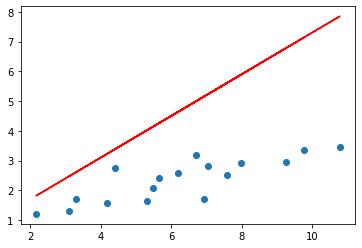

In [304]:
predicted_y_values = list(map(lambda x: 0.7*x + 0.3, X))
plt.scatter(X, Y)
plt.plot(X, predicted_y_values, c = 'r')
error = sum([ (i-j)**2 for i, j in zip(Y, predicted_y_values) ]) / len(Y)
print(error)

### We can use this function to find the mean squared error of the line

In [305]:
def find_error(x_values, y_values, w0, w1):
    total = 0
    for x, y in zip(x_values, y_values):
        total += (y - ((w1 * x) + w0)) ** 2
    return total / len(x_values)

In [306]:
find_error(X, Y, 0.3, 0.7)

6.518593101764703

In [307]:
def find_error(x_values, y_values, w0, w1):
    return np.mean([(y - ((w1 * x) + w0)) ** 2 for x,y in zip(x_values, y_values)])

In [308]:
find_error(X, Y, 0.5, 0.3)

0.16668653705882344

In [309]:
# This is garbage, has nothing to do with class. disregard it.
def weird_avg(values):
    ''''''
    curr = None
    for val in values:
        if curr is None:
            curr = val
        else:
            curr = (curr + val) / 2
    return curr

### If we change the slope and y-int to 0.3 and 0.8 the line becomes more accurate

0.16668653705882344


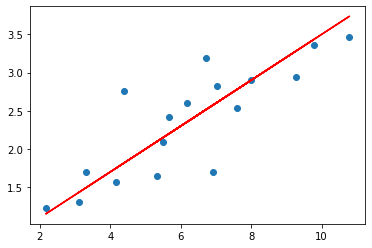

In [310]:
predicted_y_values = list(map(lambda x: 0.3*x + 0.5, X))
plt.scatter(X, Y)
plt.plot(X, predicted_y_values, c = 'r')
error = sum([ (i-j)**2 for i, j in zip(Y, predicted_y_values) ]) / len(Y)
print(error)

### It looks good but how to we find out the best slope and y int?

# KNOW THIS

In [110]:
from sklearn.linear_model import LinearRegression

lr_reg = LinearRegression()

lr_reg.fit(X.reshape(-1, 1), Y.reshape(-1, 1))

print(lr_reg.coef_)

print(lr_reg.intercept_)

[[0.00064743]]
[5226.08388164]


### This is the lowest error we'll have

In [312]:
find_error(X, Y, 0.79880123, 0.25163494)

0.15385767404191164

0.15385767404191164


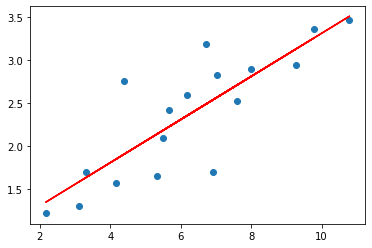

In [313]:
predicted_y_values = list(map(lambda x: 0.25163494*x + 0.79880123, X))
plt.scatter(X, Y)
plt.plot(X, predicted_y_values, c = 'r')
error = sum([ (i-j)**2 for i, j in zip(Y, predicted_y_values) ]) / len(Y)
print(error)

In [314]:
0.25163494*5 + 0.79880123

2.05697593

### We can also predict the value of another point using the predict method

In [315]:
lr_reg.predict([[5.0]])

array([[2.05697595]])

#### Numpy allows us to reshape arrays with unlimited dimensions.

#### It's useful for sklearn because many methods require 2d arrays.

In [107]:
np.array([i for i in range(64)]).reshape(8,8)

array([[ 0,  1,  2,  3,  4,  5,  6,  7],
       [ 8,  9, 10, 11, 12, 13, 14, 15],
       [16, 17, 18, 19, 20, 21, 22, 23],
       [24, 25, 26, 27, 28, 29, 30, 31],
       [32, 33, 34, 35, 36, 37, 38, 39],
       [40, 41, 42, 43, 44, 45, 46, 47],
       [48, 49, 50, 51, 52, 53, 54, 55],
       [56, 57, 58, 59, 60, 61, 62, 63]])

#### How to predict a value given a few parameters or "features"... 

- Visit DS2.0-Machine-Learning/Notebooks/simple_learn_regression.ipynb

In [108]:
x = np.array([[1,3],[7,2]])
x

array([[1, 3],
       [7, 2]])

In [111]:
X = np.array([10 ** i for i in range(9)])
Y = np.array([1, 10, 100, 475, 1675, 4954, 12952, 30817, 67987])

lr_reg = LinearRegression()
lr_reg.fit(X.reshape(-1, 1), Y.reshape(-1, 1))
print(lr_reg.coef_)
print(lr_reg.intercept_)



[[0.00064743]]
[5226.08388164]


In [320]:
import matplotlib.pyplot as plt

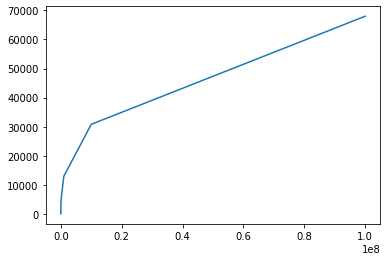

In [321]:
plt.plot([10 ** i for i in range(9)] , Y)

In [322]:
Y = [1, 10, 100, 475, 1675, 4954, 12952, 30817, 67987]

Z = [y - Y[i - 1] if i > 0 else y for i, y in enumerate(Y)]

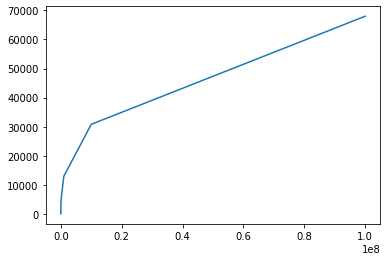

In [323]:
plt.plot(X, Y)

---
# Lesson 3: Review of Linear regression:

Text(0, 0.5, 'water drank in oz')

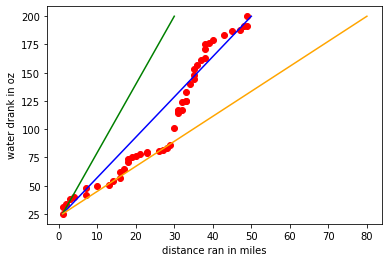

In [324]:
import matplotlib.pyplot as plt
import numpy as np
from random import randint
X = np.array(sorted([randint(1,50) for i in range(50)]))
Y = np.array(sorted([randint(25,200) for i in range(50)]))
plt.plot(X,Y, 'ro')
plt.plot([1,50], [25,200], c='blue')
plt.plot([1,30], [25,200], c='green')
plt.plot([1,80], [25,200], c='orange')
plt.xlabel('distance ran in miles')
plt.ylabel('water drank in oz')

### The plot:
- Here I plotted 50 somewhat random points and I want to find the line of best fit.
- The blue line fits better than the green and yellow lines.
- We can also say the blue line has the least error
- To find the line of best fit we can use sklearn Linear Regression

In [325]:
from sklearn.linear_model import LinearRegression

lr_reg = LinearRegression()

lr_reg.fit(X.reshape(-1, 1), Y.reshape(-1, 1))

print('w1 (slope) =', lr_reg.coef_[0][0])
print('w0 (intercept) =', lr_reg.intercept_[0])

w1 (slope) = 3.7609165779595495
w0 (intercept) = 8.403527368480027


### Error
- Error is defined as the sum of all errors from each point, to the line, squared.
- Error = sum((Ytrue[i] - Ypredict[i])**2 for i in range(len(Ytrue)))
- Mean squared error is this error divided by the length of Ytrue

<img src="images/lreg_1.png" width="600" height="600">

### Goal of linear regression: 
- to obtain the minimum error (optimal w0 and w1). Find the line of best fit.

## Steps in machine learning:
1. Read and manipulate data (pandas)
2. Figure out features and target
3. Do data normalization (numpy)
4. Split the data into train and test parts
5. Instantiate a mL model (reg_model = linearRegression())
6. Train (fit) the model with Xtrain (reg_model.fit(Xtrain, Ytrain))
7. Evaluate the model with Xtest (reg_model.predict(Xtest))
    
### Model evaluation for LR:
1. Mean squared error: compare reg_model.predict(Xtest) with Ytest
2. R_score (0 and 1) closer to 1 means better model.




## Confusion matrix

|         |Healthy  | Unhealthy   |
|:--------|:--------|:------------|
| Healthy | n1 | n2|
|Unhealthy| n3 | n4|


accuracy = (n1 + n4) / (n1+ n2+ n3+ n4)

Explained in more detail later with logistic regression



#### Regression:
- MSE - mean squared error
- R^2 (closer to 1 is better)

#### Classification:
- Confusion matrix
- accuracy

--- 
# Lesson 4: Logistic regression

In [4]:
import pandas as pd

df = pd.read_csv('datasets/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Break up the data into training and testing data

In [10]:
from sklearn.model_selection import cross_val_score, train_test_split
import pandas as pd
from sklearn.linear_model import LogisticRegression

pima = pd.read_csv('datasets/diabetes.csv')

feature_cols = ['Pregnancies', 'Insulin', 'BMI', 'Age']

# X is a matrix,access the features we want in feature_cols
X = pima[feature_cols]

# y is a vector, hence we use dot to access 'label'
y = pima['Outcome']

# split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

y_test.value_counts()

0    130
1     62
Name: Outcome, dtype: int64

## Build the logistic regression model

In [13]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

# fit model
logreg.fit(X_train, y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

### See what the model predicts for our y predictions

In [21]:
y_pred = logreg.predict(X_test)

y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

### Lets look at the actual values

In [20]:
y_test.values.T

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0])

#### Write a function that counts:
- how many 0s in y_pred are 0s in y_test
- how many 1s in y_pred are 1s in y_test
- how many 0s in y_pred are 1s in y_test
- how many 1s in y_pred are 0s in y_test

It should return these four values in that order

This will give us the values for our confusion matrix

In [103]:
def confusion_matrix(predicted_values, test_values):
    actual_zeroes = 0
    actual_ones = 0
    false_zeroes = 0
    false_ones = 0
    for predicted_value, test_value in zip(predicted_values, test_values):
        if predicted_value == 0 and test_value == 0:
            actual_zeroes += 1
        elif predicted_value == 1 and test_value == 1:
            actual_ones += 1
        elif predicted_value == 0 and test_value == 1:
            false_zeroes += 1
        elif predicted_value == 1 and test_value == 0:
            false_ones += 1
    return [[actual_zeroes, false_ones],[false_zeroes, actual_ones]]

confusion_matrix(y_pred, y_test.values.T)

[[118, 12], [47, 15]]

In [101]:
def one_line_confusion_matrix(predicted_values, actual_values):
    return [[sum([x == 0 and y == 0 for x, y in zip(predicted_values, actual_values)]), sum([x == 1 and y == 0 for x, y in zip(predicted_values, actual_values)])], [sum([x == 0 and y == 1 for x, y in zip(predicted_values, actual_values)]), sum([x == 1 and y == 1 for x, y in zip(predicted_values, actual_values)])]]

one_line_confusion_matrix(y_pred, y_test.values.T)

[[118, 12], [47, 15]]

## Confusion Matrix
A confusion matrix is like a punnet square from biology.
These describe the real value vs the predicted value.
It us good when the expected is the same as the real value.
This means we like when the points 0,0 and 1,1 are greater.
Optimally we want 1,0 and 0,1 to be 1. This is a perfect model.

|   | 0 | 1 |
|:--|:--|:--|
| 0 |118| 12|
| 1 | 47| 15|



### Easier way to compute elements of Confusion Matrix

In [60]:
from sklearn import metrics

# using sklearn's metrics we can create a confusion matrix that is given in a 2D array
confusion = metrics.confusion_matrix(y_test, y_pred)

confusion

array([[118,  12],
       [ 47,  15]])

#### Labeling the confusion matrix:
- True positive - when we expect a positive result and we get one. So if we expect 1 we get 1.
- True negative - the opposite of true positive, that is if we expect 0 we get 0.
- False positive - when we expect a positive result but recieve a negative one. So if we expect 1 and get 0.
- False negative - the opposite of false positives, that is if we expect 0 we get 1.

In [86]:
TP = confusion[1,1] # TRUE POSITIVE
TN = confusion[0,0] # TRUE NEGATIVE
FP = confusion[0,1] # FALSE POSITIVE
FN = confusion[1,0] # FASLE NEGATIVE

### To calculate the model's accuracy we can add TN and TP then divide by the TOTAL

(TN + TP) / total

In [87]:
def model_accuracy(confusion_matrix):
    TP = confusion_matrix[1,1]
    TN = confusion_matrix[0,0]
    return (TP + TN) / sum(sum(confusion_matrix))

model_accuracy(confusion)

0.6927083333333334

### Important note:
##### K - nearest neighbors for classifiers is not taught, but it is in the tutorial.
##### IT WILL ALSO BE A QUESTION ON THE FINAL